In [1]:
# Import Libraries and Dependencies 

import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import urllib.request
import matplotlib.pyplot as plt
import os
import json
from pathlib import Path
from datetime import datetime, timedelta
from tiingo import TiingoClient
import seaborn as sb
%matplotlib inline
import pandas_montecarlo
#pip install --user --upgrade matplotlib
#pip install pandas_montecarlo

In [2]:
# grab data set from url *multipul updates each day make sure we are on current tab....

cv_data = pd.read_html('https://docs.google.com/spreadsheets/d/1wQVypefm946ch4XDp37uZ-wartW4V7ILdg-qYiDXUHM/htmlview?usp=sharing&sle=true#')

In [3]:
#combine all tabs from data set
cv_data =pd.concat(cv_data)
cv_data

C:\Users\phale\Anaconda3\envs\vizenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,A,B,C,D,E,F,G,H,I,Unnamed: 0
0,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,NaN,NaN,NaN,1
1,Hubei,Mainland China,2/7/20 14:03,22112,618,867,NaN,NaN,NaN,2
2,Guangdong,Mainland China,2/7/20 10:13,1034,1,88,NaN,NaN,NaN,3
3,Zhejiang,Mainland China,2/7/20 11:33,1006,0,123,NaN,NaN,NaN,4
4,Henan,Mainland China,2/7/20 14:03,914,3,86,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...
23,Heilongjiang,China,1/21/2020,NaN,1,NaN,NaN,NaN,NaN,24
24,NaN,Japan,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,25
25,NaN,Thailand,1/21/2020,2,NaN,NaN,NaN,NaN,NaN,26
26,NaN,South Korea,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,27


In [4]:

#remove Strings from 1st row
cv_data.drop([0], inplace=True)
cv_data

,A,B,C,D,E,F,G,H,I,Unnamed: 0
1,Hubei,Mainland China,2/7/20 14:03,22112,618,867,NaN,NaN,NaN,2
2,Guangdong,Mainland China,2/7/20 10:13,1034,1,88,NaN,NaN,NaN,3
3,Zhejiang,Mainland China,2/7/20 11:33,1006,0,123,NaN,NaN,NaN,4
4,Henan,Mainland China,2/7/20 14:03,914,3,86,NaN,NaN,NaN,5
5,Hunan,Mainland China,2/7/20 11:33,772,0,112,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...
23,Heilongjiang,China,1/21/2020,NaN,1,NaN,NaN,NaN,NaN,24
24,NaN,Japan,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,25
25,NaN,Thailand,1/21/2020,2,NaN,NaN,NaN,NaN,NaN,26
26,NaN,South Korea,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,27


In [5]:
#drop "Unnamed:0"

#cv_data =cv_data.drop(columns=['Unnamed: 0','G','H','I'], inplace=True)

#cv_data

#rename columns in dataframe

cv_data = cv_data.rename(columns={
    'A':'Province/State',
    'B':'Country/Region',
    'C':'Last_Update',
    'D':'Infected',
    'E':'Deaths',
    'F':'Recovered',
    
})

In [6]:
cv_data.head()

,Province/State,Country/Region,Last_Update,Infected,Deaths,Recovered,G,H,I,Unnamed: 0
1,Hubei,Mainland China,2/7/20 14:03,22112,618,867,NaN,NaN,NaN,2
2,Guangdong,Mainland China,2/7/20 10:13,1034,1,88,NaN,NaN,NaN,3
3,Zhejiang,Mainland China,2/7/20 11:33,1006,0,123,NaN,NaN,NaN,4
4,Henan,Mainland China,2/7/20 14:03,914,3,86,NaN,NaN,NaN,5
5,Hunan,Mainland China,2/7/20 11:33,772,0,112,NaN,NaN,NaN,6


In [7]:
#set index

cv_data =cv_data.set_index('Last_Update')

cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered,G,H,I,Unnamed: 0
Last_Update,,,,,,,,,
2/7/20 14:03,Hubei,Mainland China,22112,618,867,NaN,NaN,NaN,2
2/7/20 10:13,Guangdong,Mainland China,1034,1,88,NaN,NaN,NaN,3
2/7/20 11:33,Zhejiang,Mainland China,1006,0,123,NaN,NaN,NaN,4
2/7/20 14:03,Henan,Mainland China,914,3,86,NaN,NaN,NaN,5
2/7/20 11:33,Hunan,Mainland China,772,0,112,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...
1/21/2020,Heilongjiang,China,NaN,1,NaN,NaN,NaN,NaN,24
1/21/2020,NaN,Japan,1,NaN,NaN,NaN,NaN,NaN,25
1/21/2020,NaN,Thailand,2,NaN,NaN,NaN,NaN,NaN,26


In [8]:
#drop "Unnamed:0"

cv_data =cv_data.drop(columns=['Unnamed: 0','G','H','I'], inplace=False)




In [9]:
cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/7/20 14:03,Hubei,Mainland China,22112,618,867
2/7/20 10:13,Guangdong,Mainland China,1034,1,88
2/7/20 11:33,Zhejiang,Mainland China,1006,0,123
2/7/20 14:03,Henan,Mainland China,914,3,86
2/7/20 11:33,Hunan,Mainland China,772,0,112
...,...,...,...,...,...
1/21/2020,Heilongjiang,China,NaN,1,NaN
1/21/2020,NaN,Japan,1,NaN,NaN
1/21/2020,NaN,Thailand,2,NaN,NaN


In [10]:
cv_data.isnull()

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/7/20 14:03,False,False,False,False,False
2/7/20 10:13,False,False,False,False,False
2/7/20 11:33,False,False,False,False,False
2/7/20 14:03,False,False,False,False,False
2/7/20 11:33,False,False,False,False,False
...,...,...,...,...,...
1/21/2020,False,False,True,False,True
1/21/2020,True,False,False,True,True
1/21/2020,True,False,False,True,True


In [11]:
cv_data.dropna(inplace=True)
cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/7/20 14:03,Hubei,Mainland China,22112,618,867
2/7/20 10:13,Guangdong,Mainland China,1034,1,88
2/7/20 11:33,Zhejiang,Mainland China,1006,0,123
2/7/20 14:03,Henan,Mainland China,914,3,86
2/7/20 11:33,Hunan,Mainland China,772,0,112
...,...,...,...,...,...
1/25/2020 12:00 PM,Shanghai,Mainland China,40,72,1
1/25/2020 12:00 PM,Shanghai,Mainland China,33,72,1
1/25/2020 12:00 AM,Shanghai,Mainland China,33,22,1


In [12]:
cv_data.isnull().sum()
cv_data.head()

#cv_data['ratio']= cv_data['Deaths']/ cv_data['Confirmed']

cv_data.dtypes

Province/State    object
Country/Region    object
Infected          object
Deaths            object
Recovered         object
dtype: object

In [13]:
# change types from object to int.
#people_df['Person_ID'] = people_df['Person_ID'].astype('int')

cv_data['Infected'] = cv_data['Infected'].astype('int')
cv_data['Deaths'] = cv_data['Deaths'].astype('int')
cv_data['Recovered'] = cv_data['Recovered'].astype('int')

cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/7/20 14:03,Hubei,Mainland China,22112,618,867
2/7/20 10:13,Guangdong,Mainland China,1034,1,88
2/7/20 11:33,Zhejiang,Mainland China,1006,0,123
2/7/20 14:03,Henan,Mainland China,914,3,86
2/7/20 11:33,Hunan,Mainland China,772,0,112
...,...,...,...,...,...
1/25/2020 12:00 PM,Shanghai,Mainland China,40,72,1
1/25/2020 12:00 PM,Shanghai,Mainland China,33,72,1
1/25/2020 12:00 AM,Shanghai,Mainland China,33,22,1


In [14]:
cv_data[['Province/State']].duplicated()

Last_Update
2/7/20 14:03          False
2/7/20 10:13          False
2/7/20 11:33          False
2/7/20 14:03          False
2/7/20 11:33          False
                      ...  
1/25/2020 12:00 PM     True
1/25/2020 12:00 PM     True
1/25/2020 12:00 AM     True
1/24/2020 12:00 PM     True
1/23/20 12:00 PM       True
Length: 747, dtype: bool

In [15]:
#create a for loop to clean up duplicates for each day and get a running total for that days end.
#just use cumprod feature?
cv_data_days= cv_data.drop_duplicates(subset=['Province/State'], inplace=False)

In [16]:
cv_data_days

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/7/20 14:03,Hubei,Mainland China,22112,618,867
2/7/20 10:13,Guangdong,Mainland China,1034,1,88
2/7/20 11:33,Zhejiang,Mainland China,1006,0,123
2/7/20 14:03,Henan,Mainland China,914,3,86
2/7/20 11:33,Hunan,Mainland China,772,0,112
2/7/20 5:13,Anhui,Mainland China,665,0,47
2/7/20 1:23,Jiangxi,Mainland China,661,0,45
2/7/20 12:03,Chongqing,Mainland China,415,2,31
2/7/20 14:03,Jiangsu,Mainland China,408,0,43


In [17]:
cv_data_days['Deaths'].sum()

637

In [18]:
cv_data_days['Infected'].sum()

31364

In [19]:
cv_data_days['Recovered'].sum()

1754

In [20]:
#add totals of columns together for their individual daily total to be added to df daily
# replace index with date use current 

cv_data_2= cv_data.reset_index()

In [21]:
cv_data_2


,Last_Update,Province/State,Country/Region,Infected,Deaths,Recovered
0,2/7/20 14:03,Hubei,Mainland China,22112,618,867
1,2/7/20 10:13,Guangdong,Mainland China,1034,1,88
2,2/7/20 11:33,Zhejiang,Mainland China,1006,0,123
3,2/7/20 14:03,Henan,Mainland China,914,3,86
4,2/7/20 11:33,Hunan,Mainland China,772,0,112
...,...,...,...,...,...,...
742,1/25/2020 12:00 PM,Shanghai,Mainland China,40,72,1
743,1/25/2020 12:00 PM,Shanghai,Mainland China,33,72,1
744,1/25/2020 12:00 AM,Shanghai,Mainland China,33,22,1
745,1/24/2020 12:00 PM,Shanghai,Mainland China,20,22,1


In [22]:

#add new date column to get rid of time stamp
cv_data_2['Last_Update']= pd.to_datetime(cv_data_2.Last_Update)
cv_data_2['Date']= cv_data_2['Last_Update'].dt.strftime('%m/%d/%Y')
print (cv_data_2)


            Last_Update Province/State  Country/Region  Infected  Deaths  \
0   2020-02-07 14:03:00          Hubei  Mainland China     22112     618   
1   2020-02-07 10:13:00      Guangdong  Mainland China      1034       1   
2   2020-02-07 11:33:00       Zhejiang  Mainland China      1006       0   
3   2020-02-07 14:03:00          Henan  Mainland China       914       3   
4   2020-02-07 11:33:00          Hunan  Mainland China       772       0   
..                  ...            ...             ...       ...     ...   
742 2020-01-25 12:00:00       Shanghai  Mainland China        40      72   
743 2020-01-25 12:00:00       Shanghai  Mainland China        33      72   
744 2020-01-25 00:00:00       Shanghai  Mainland China        33      22   
745 2020-01-24 12:00:00       Shanghai  Mainland China        20      22   
746 2020-01-23 12:00:00      Guangdong  Mainland China        32       1   

     Recovered        Date  
0          867  02/07/2020  
1           88  02/07/2020  


In [23]:
# Set index as 'Date'
cv_data_2.set_index('Date')

,Last_Update,Province/State,Country/Region,Infected,Deaths,Recovered
Date,,,,,,
02/07/2020,2020-02-07 14:03:00,Hubei,Mainland China,22112,618,867
02/07/2020,2020-02-07 10:13:00,Guangdong,Mainland China,1034,1,88
02/07/2020,2020-02-07 11:33:00,Zhejiang,Mainland China,1006,0,123
02/07/2020,2020-02-07 14:03:00,Henan,Mainland China,914,3,86
02/07/2020,2020-02-07 11:33:00,Hunan,Mainland China,772,0,112
...,...,...,...,...,...,...
01/25/2020,2020-01-25 12:00:00,Shanghai,Mainland China,40,72,1
01/25/2020,2020-01-25 12:00:00,Shanghai,Mainland China,33,72,1
01/25/2020,2020-01-25 00:00:00,Shanghai,Mainland China,33,22,1


In [24]:
cv_data_2.drop(columns=['Last_Update'])

,Province/State,Country/Region,Infected,Deaths,Recovered,Date
0,Hubei,Mainland China,22112,618,867,02/07/2020
1,Guangdong,Mainland China,1034,1,88,02/07/2020
2,Zhejiang,Mainland China,1006,0,123,02/07/2020
3,Henan,Mainland China,914,3,86,02/07/2020
4,Hunan,Mainland China,772,0,112,02/07/2020
...,...,...,...,...,...,...
742,Shanghai,Mainland China,40,72,1,01/25/2020
743,Shanghai,Mainland China,33,72,1,01/25/2020
744,Shanghai,Mainland China,33,22,1,01/25/2020
745,Shanghai,Mainland China,20,22,1,01/24/2020


In [25]:
#drop duplicates in order to get the last value for the day
cv_data_2.drop_duplicates(subset=['Province/State', "Date"], inplace=True)
cv_data_2

,Last_Update,Province/State,Country/Region,Infected,Deaths,Recovered,Date
0,2020-02-07 14:03:00,Hubei,Mainland China,22112,618,867,02/07/2020
1,2020-02-07 10:13:00,Guangdong,Mainland China,1034,1,88,02/07/2020
2,2020-02-07 11:33:00,Zhejiang,Mainland China,1006,0,123,02/07/2020
3,2020-02-07 14:03:00,Henan,Mainland China,914,3,86,02/07/2020
4,2020-02-07 11:33:00,Hunan,Mainland China,772,0,112,02/07/2020
...,...,...,...,...,...,...,...
738,2020-01-26 23:00:00,Hubei,Mainland China,1423,76,44,01/26/2020
739,2020-01-26 23:00:00,Shanghai,Mainland China,53,1,1,01/26/2020
742,2020-01-25 12:00:00,Shanghai,Mainland China,40,72,1,01/25/2020
745,2020-01-24 12:00:00,Shanghai,Mainland China,20,22,1,01/24/2020


In [26]:
#create new data frame extracting only mainland China info
cv_data_china=cv_data_2.loc[cv_data_2['Country/Region']=='Mainland China']
cv_data_china

,Last_Update,Province/State,Country/Region,Infected,Deaths,Recovered,Date
0,2020-02-07 14:03:00,Hubei,Mainland China,22112,618,867,02/07/2020
1,2020-02-07 10:13:00,Guangdong,Mainland China,1034,1,88,02/07/2020
2,2020-02-07 11:33:00,Zhejiang,Mainland China,1006,0,123,02/07/2020
3,2020-02-07 14:03:00,Henan,Mainland China,914,3,86,02/07/2020
4,2020-02-07 11:33:00,Hunan,Mainland China,772,0,112,02/07/2020
...,...,...,...,...,...,...,...
738,2020-01-26 23:00:00,Hubei,Mainland China,1423,76,44,01/26/2020
739,2020-01-26 23:00:00,Shanghai,Mainland China,53,1,1,01/26/2020
742,2020-01-25 12:00:00,Shanghai,Mainland China,40,72,1,01/25/2020
745,2020-01-24 12:00:00,Shanghai,Mainland China,20,22,1,01/24/2020


In [27]:
#Group by 'Date' in order to sum all
all_sum_cv = cv_data_china.groupby('Date').sum()

In [28]:
all_sum_cv.reset_index(inplace=True)

In [29]:
all_sum_cv.Date = pd.to_datetime(all_sum_cv.Date)

In [30]:
all_sum_cv.set_index('Date',inplace=True) 

In [31]:
#Find ratio of deaths to confirmed effected
#round decimals .000 
all_sum_cv['death_ratio']= all_sum_cv['Deaths']/ all_sum_cv['Infected']
all_sum_cv['recovered_ratio'] =all_sum_cv['Recovered']/ all_sum_cv['Infected']
#decimals =pd.Series ([3,3], index=['death_ratio', 'recovered_ratio'])
#cv_data.round(decimals)

In [32]:
all_sum_cv.head()

,Infected,Deaths,Recovered,death_ratio,recovered_ratio
Date,,,,,
2020-01-23,32,1,2,0.031250,0.062500
2020-01-24,20,22,1,1.100000,0.050000
2020-01-25,40,72,1,1.800000,0.025000
2020-01-26,1476,77,45,0.052168,0.030488
2020-01-27,2860,102,52,0.035664,0.018182


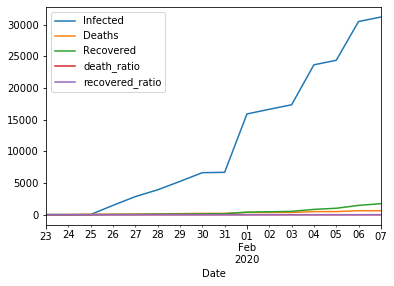

In [33]:
all_sum_cv.plot()

In [34]:
##Monte Carlo Simulation on Corona Virus

In [35]:
#jjp - fixed name
infection_change = all_sum_cv.pct_change()

In [36]:
infection_change.tail()

,Infected,Deaths,Recovered,death_ratio,recovered_ratio
Date,,,,,
2020-02-03,0.042363,0.000000,0.140389,-0.040641,0.094042
2020-02-04,0.363752,0.357341,0.596591,-0.004701,0.170734
2020-02-05,0.030139,0.004082,0.208778,-0.025295,0.173413
2020-02-06,0.251128,0.284553,0.442591,0.026715,0.153032
2020-02-07,0.023155,0.006329,0.188435,-0.016445,0.161540


In [37]:
# Calcualte average daily return of infection/Death/and Recovered?
avg_infected = infection_change.Infected.mean()
avg_death = infection_change.Deaths.mean()
avg_recovered = infection_change.Recovered.mean()

In [38]:
#Calculate the STD of Infection_change
std_infected = infection_change['Infected'].std()
std_deaths = infection_change['Deaths'].std()
std_recovered = infection_change['Recovered'].std()

In [39]:
avg_recovered

3.2167818509723443

In [40]:
# Save the last days total
Infected_monte =all_sum_cv['Infected'][-1]
Deaths_monte =all_sum_cv['Deaths'][-1]
Recovered_monte =all_sum_cv['Recovered'][-1]

In [41]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 30
monte_carlo = pd.DataFrame()
CV_Monte_Corona = pd.DataFrame()

In [42]:
# Run the Monte Carlo Simulation
for x in range (number_simulations):
    simulated_infected = [Infected_monte]
    #simulated_deaths = [Deaths_monte]
    #simulated_recovered = [Recovered_monte]
    
    for y in range (number_records):
        growth_infected = simulated_infected[-1] * (1 + np.random.normal(avg_infected, std_infected))
        #growth_deaths = simulated_deaths[-1] * (1 + np.random.normal(avg_death, std_deaths))
        #growth_recovered = simulated_recovered[-1] * (1 + np.random.normal(avg_recovered, std_recovered))
       
        simulated_infected.append(growth_infected)
        #simulated_deaths.append(growth_deaths)
        #simulated_recovered.append(growth_recovered)
    
    monte_carlo['Infected'] = pd.Series(simulated_infected)
    #monte_carlo['Deaths'] = pd.Series(simulated_deaths)
    #monte_carlo['Recovered'] = pd.Series(simulated_recovered)
    
    #simulated_CV_return = monte_carlo.pct_change()
    
    
    #weights = [(1), (1), (1)]
    #Infected_daily_growth = infection_change.dot(weights)
    
    CV_Monte_Corona[x] = (1+ monte_carlo.fillna(0)).cumprod()
CV_Monte_Corona

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [43]:
#Visualize the Simulation

plot_title = f'{number_simulations} Simulations of The Corona Virus Cumulative Growth Trajectories Over The Next{number_records} Trading Days'
CV_Monte_Corona.plot(legend=None, title=plot_title, figsize=(15,10))

TypeError: no numeric data to plot

In [44]:
# below is Stock Data

In [45]:
# Bring Env Variables into Python/Store in Variable
tiingo = os.getenv('TIINGO_API_KEY')

In [46]:
# Create a Client to Connect to Tiingo
client = TiingoClient()

In [47]:
# Create Start and End Dates for 1 Year's Worth of Historical Data
end = datetime.now()
start = end + timedelta(-30)

In [48]:
# Create DataFrames for China
china_ticker_df = client.get_dataframe(['ASHR','CQQQ', 'CHIE', 'CHIM', 'KURE', 'CHIS'],
                                            metric_name='close',
                                            startDate= start,
                                            endDate= end,
                                            frequency='daily')

C:\Users\phale\Anaconda3\envs\vizenv\lib\site-packages\tiingo\api.py:270: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  prices = pd.concat([prices, df[stock]], axis=1)


In [49]:
china_df = china_ticker_df.rename(columns={'ASHR':'ASHR (China SH Composite)','CQQQ':'CQQQ (China Technology)', 'CHIE':'CHIE (China Energy)', 'CHIM':'CHIM (China Materials)', 'KURE':'KURE (China Healthcare)', 'CHIS':'CHIS (China Consumer Staples)'})
china_df.head()

,ASHR (China SH Composite),CQQQ (China Technology),CHIE (China Energy),CHIM (China Materials),KURE (China Healthcare),CHIS (China Consumer Staples)
date,,,,,,
2020-01-09 00:00:00+00:00,30.27,56.55,10.9779,17.225,23.8500,22.39
2020-01-10 00:00:00+00:00,30.27,57.04,11.0100,17.065,23.8330,22.40
2020-01-13 00:00:00+00:00,30.88,58.93,11.0150,17.260,24.4151,22.75
2020-01-14 00:00:00+00:00,30.64,57.74,10.9050,17.430,24.1469,22.58
2020-01-15 00:00:00+00:00,30.41,57.94,10.9250,17.285,24.1896,22.62


In [50]:
# Count/Drop Nulls (if any)
china_df.isnull().sum()

ASHR (China SH Composite)        0
CQQQ (China Technology)          0
CHIE (China Energy)              0
CHIM (China Materials)           0
KURE (China Healthcare)          0
CHIS (China Consumer Staples)    0
dtype: int64

In [51]:
china_df.dropna(inplace=True)
china_df.isnull().sum()

ASHR (China SH Composite)        0
CQQQ (China Technology)          0
CHIE (China Energy)              0
CHIM (China Materials)           0
KURE (China Healthcare)          0
CHIS (China Consumer Staples)    0
dtype: int64

In [52]:
china_daily_returns = china_df.pct_change()
china_daily_returns.head()

,ASHR (China SH Composite),CQQQ (China Technology),CHIE (China Energy),CHIM (China Materials),KURE (China Healthcare),CHIS (China Consumer Staples)
date,,,,,,
2020-01-09 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-10 00:00:00+00:00,0.000000,0.008665,0.002924,-0.009289,-0.000713,0.000447
2020-01-13 00:00:00+00:00,0.020152,0.033135,0.000454,0.011427,0.024424,0.015625
2020-01-14 00:00:00+00:00,-0.007772,-0.020193,-0.009986,0.009849,-0.010985,-0.007473
2020-01-15 00:00:00+00:00,-0.007507,0.003464,0.001834,-0.008319,0.001768,0.001771


In [53]:
us_ticker_df = client.get_dataframe(['SPY','IGM', 'IYE', 'IYM', 'IYH', 'IECS'],
                                            metric_name='close',
                                            startDate= start,
                                            endDate= end,
                                            frequency='daily')

In [54]:
us_df = us_ticker_df.rename(columns={'SPY':'SPY (USA SP500 Composite)', 'IGM':'IGM (USA Technology)', 'IYE':'IYE (USA Energy)', 'IYM':'IYM (USA Materials)', 'IYH':'IYH (USA Healthcare)', 'IECS':'IECS (USA Consumer Staples)'})

us_df.head()

,SPY (USA SP500 Composite),IGM (USA Technology),IYE (USA Energy),IYM (USA Materials),IYH (USA Healthcare),IECS (USA Consumer Staples)
date,,,,,,
2020-01-09 00:00:00+00:00,326.65,250.76,32.10,95.07,217.63,28.564
2020-01-10 00:00:00+00:00,325.71,250.35,31.90,94.51,217.80,28.586
2020-01-13 00:00:00+00:00,327.95,253.39,31.92,95.85,216.87,28.803
2020-01-14 00:00:00+00:00,327.45,251.90,31.94,95.86,218.16,28.788
2020-01-15 00:00:00+00:00,328.19,252.33,31.75,96.25,220.01,29.007


In [55]:
us_daily_returns = us_df.pct_change()
us_daily_returns.head()

,SPY (USA SP500 Composite),IGM (USA Technology),IYE (USA Energy),IYM (USA Materials),IYH (USA Healthcare),IECS (USA Consumer Staples)
date,,,,,,
2020-01-09 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-10 00:00:00+00:00,-0.002878,-0.001635,-0.006231,-0.005890,0.000781,0.000770
2020-01-13 00:00:00+00:00,0.006877,0.012143,0.000627,0.014178,-0.004270,0.007591
2020-01-14 00:00:00+00:00,-0.001525,-0.005880,0.000627,0.000104,0.005948,-0.000521
2020-01-15 00:00:00+00:00,0.002260,0.001707,-0.005949,0.004068,0.008480,0.007607


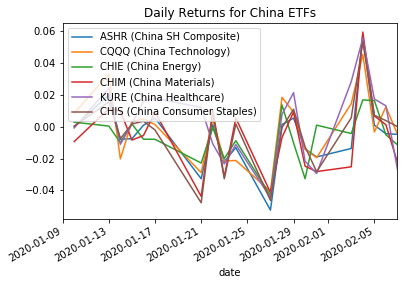

In [56]:
china_daily_returns.plot(title="Daily Returns for China ETFs")

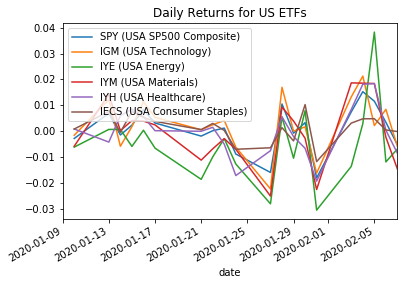

In [57]:
us_daily_returns.plot(title="Daily Returns for US ETFs")

In [58]:
china_std = china_daily_returns.std()
china_std

ASHR (China SH Composite)        0.021429
CQQQ (China Technology)          0.021144
CHIE (China Energy)              0.015093
CHIM (China Materials)           0.023823
KURE (China Healthcare)          0.024212
CHIS (China Consumer Staples)    0.022632
dtype: float64

In [59]:
us_std = us_daily_returns.std()
us_std

SPY (USA SP500 Composite)      0.008519
IGM (USA Technology)           0.010537
IYE (USA Energy)               0.014389
IYM (USA Materials)            0.012587
IYH (USA Healthcare)           0.009752
IECS (USA Consumer Staples)    0.005369
dtype: float64

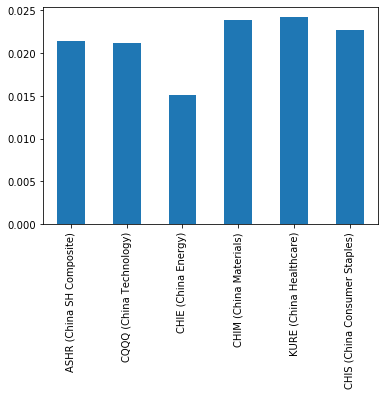

In [60]:
china_std.plot.bar()

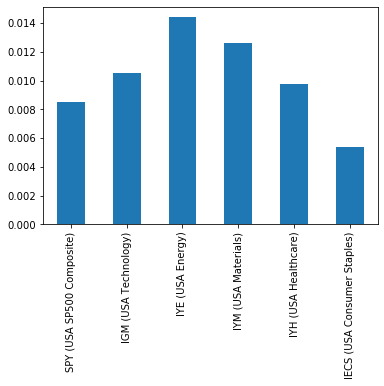

In [61]:
us_std.plot.bar()

In [62]:
#only need to run this once to normalize the 
all_sum_cv.index = all_sum_cv.index.tz_localize('UTC')

In [63]:
## Correlation Studies

In [64]:
china_cv_raw_df = pd.concat([china_df, all_sum_cv], axis=1, sort=True)
china_cv_raw_df.dropna(inplace=True)

In [65]:
usa_cv_raw_df = pd.concat([us_df, all_sum_cv], axis=1, sort=True)
usa_cv_raw_df.dropna(inplace=True)

In [66]:
usa_china_raw_df = pd.concat([us_df, china_df], axis=1, sort=True)
usa_china_raw_df.dropna(inplace=True)

In [122]:
all_data_raw_df = pd.concat([us_df, china_df, all_sum_cv], axis=1, sort=True)
all_data_raw_df.dropna(inplace=True)
#may need to take out duplicates

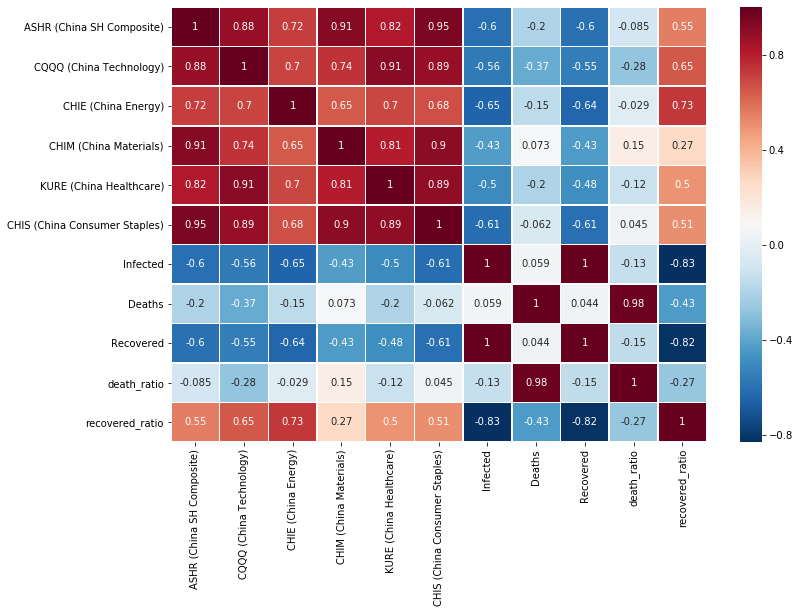

In [68]:
# China and the Coronavirus Correlations
#help from: https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04
#help from https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger
china_correl = china_cv_raw_df.pct_change().corr(method='pearson')
fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2)
sb.heatmap(china_correl, 
            xticklabels=china_correl.columns,
            yticklabels=china_correl.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

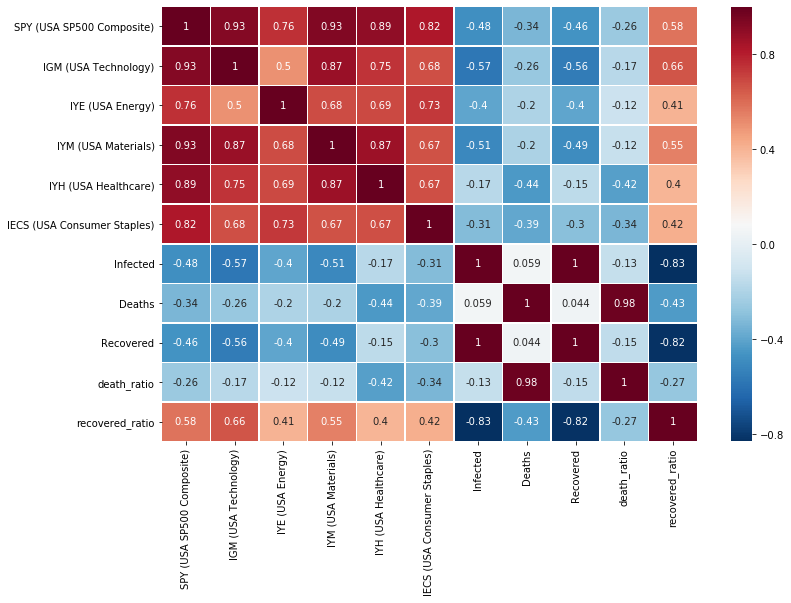

In [69]:
# USA and the Coronavirus Correlations
#help from: https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04
#help from https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger
usa_correl = usa_cv_raw_df.pct_change().corr(method='pearson')
fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2)
sb.heatmap(usa_correl, 
            xticklabels=usa_correl.columns,
            yticklabels=usa_correl.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

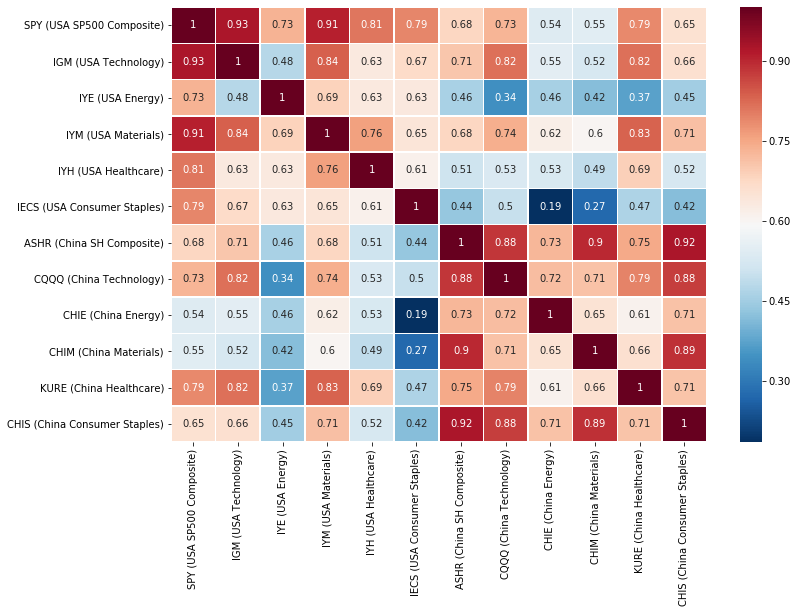

In [70]:
# China and the USA Correlations
#help from: https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04
#help from https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger
usa_china_correl = usa_china_raw_df.pct_change().corr(method='pearson')
fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2)
sb.heatmap(usa_china_correl, 
            xticklabels=usa_china_correl.columns,
            yticklabels=usa_china_correl.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [71]:
mc_corona = all_sum_cv['Infected'].montecarlo(sims=100, bust=-0.1, goal=1)

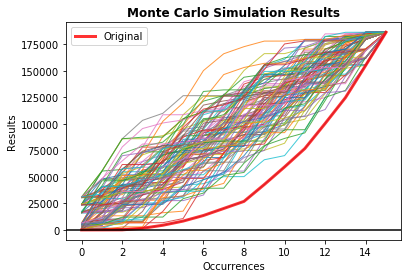

In [72]:
mc_corona.plot()

In [115]:
df_mc_corona =  mc_corona.data

([array([25., 14., 13.,  0.,  0., 15.,  0., 17.,  0., 16.]),
  array([40., 11., 14.,  0.,  0., 17.,  0.,  9.,  0.,  9.]),
  array([36.,  9., 10.,  0.,  0., 20.,  0., 11.,  0., 14.]),
  array([43., 10., 14.,  0.,  0., 17.,  0., 11.,  0.,  5.]),
  array([33., 14., 12.,  0.,  0., 16.,  0., 10.,  0., 15.]),
  array([25., 11., 11.,  0.,  0., 25.,  0., 15.,  0., 13.]),
  array([28., 12., 16.,  0.,  0., 16.,  0.,  9.,  0., 19.]),
  array([35., 13., 13.,  0.,  0., 17.,  0., 13.,  0.,  9.]),
  array([32.,  7., 10.,  0.,  0., 19.,  0., 17.,  0., 15.]),
  array([21., 13., 14.,  0.,  0., 21.,  0., 14.,  0., 17.]),
  array([32., 11., 15.,  0.,  0., 17.,  0., 13.,  0., 12.]),
  array([30., 16.,  9.,  0.,  0., 17.,  0., 12.,  0., 16.]),
  array([27., 14.,  8.,  0.,  0., 20.,  0., 15.,  0., 16.]),
  array([33., 14., 11.,  0.,  0., 21.,  0., 10.,  0., 11.]),
  array([30., 15., 12.,  0.,  0., 21.,  0., 14.,  0.,  8.]),
  array([30., 16., 18.,  0.,  0., 21.,  0., 10.,  0.,  5.])],
 array([2.00000e+01, 3.

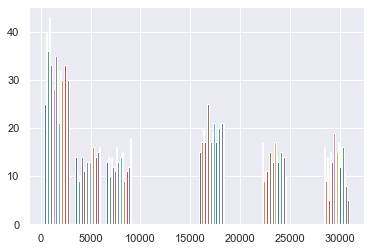

In [118]:
plt.hist(df_mc_corona)

In [102]:
df_all_data_chg = all_data_raw_df.pct_change()
# basic scatterplot
#sb.plot(data=df_all_data_chg[["SPY (USA SP500 Composite)","ASHR (China SH Composite)", "Infected"]], fit_reg=False)

# Plot the responses for different events and regions
sb.lineplot(x=df_all_data_chg.index, 
            y=df_all_data_chg[["SPY (USA SP500 Composite)","ASHR (China SH Composite)", "Infected"]], 
            fit_reg=False) 
# control x and y limits
sb.plt.ylim(0, 20)
sb.plt.xlim(0, None)

sb.plt.show()
#df_all_data_chg[["SPY (USA SP500 Composite)","ASHR (China SH Composite)", "Infected"]].plot()

C:\Users\phale\Anaconda3\envs\vizenv\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


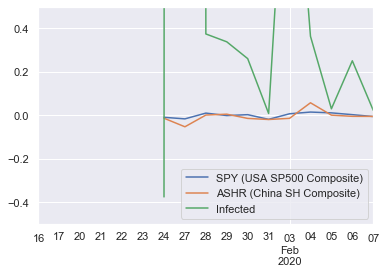

In [126]:
df_all_data_chg = all_data_raw_df.pct_change()
df_all_data_chg[["SPY (USA SP500 Composite)","ASHR (China SH Composite)", "Infected"]].plot(ylim=(-.5,.5),xlim=('2020-01-16','2020-02-07'))

C:\Users\phale\Anaconda3\envs\vizenv\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\phale\Anaconda3\envs\vizenv\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2., 0., 1., 1., 0., 1., 2., 1., 2., 1.]),
 array([-0.01815796, -0.01481804, -0.01147811, -0.00813819, -0.00479827,
        -0.00145835,  0.00188158,  0.0052215 ,  0.00856142,  0.01190135,
         0.01524127]),
 <a list of 10 Patch objects>)

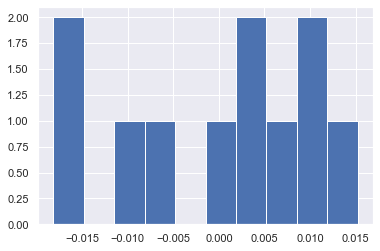

In [124]:
plt.hist(df_all_data_chg['SPY (USA SP500 Composite)'])

In [125]:
plt.hist(df_all_data_chg['ASHR (China SH Composite)'])

In [127]:
df_all_data_chg

,SPY (USA SP500 Composite),IGM (USA Technology),IYE (USA Energy),IYM (USA Materials),IYH (USA Healthcare),IECS (USA Consumer Staples),ASHR (China SH Composite),CQQQ (China Technology),CHIE (China Energy),CHIM (China Materials),KURE (China Healthcare),CHIS (China Consumer Staples),Infected,Deaths,Recovered,death_ratio,recovered_ratio
2020-01-23 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24 00:00:00+00:00,-0.008893,-0.006232,-0.012762,-0.007066,-0.017239,-0.007056,-0.013103,-0.021189,-0.008742,0.005544,-0.011192,0.001791,-0.375000,21.000000,-0.500000,34.200000,-0.200000
2020-01-27 00:00:00+00:00,-0.016029,-0.022397,-0.028174,-0.025173,-0.007617,-0.006479,-0.052411,-0.040543,-0.043116,-0.041348,-0.044628,-0.046307,142.000000,3.636364,51.000000,-0.967578,-0.636364
2020-01-28 00:00:00+00:00,0.010479,0.016934,0.005457,0.009261,0.005489,0.001315,0.001475,0.018547,0.013825,-0.006709,0.007785,-0.000557,0.374476,0.264706,0.711538,-0.079863,0.245230
2020-01-29 00:00:00+00:00,-0.000826,-0.000039,-0.010516,0.003886,-0.002128,-0.003825,0.005523,0.009198,-0.010101,0.009328,0.021459,0.011055,0.338336,0.302326,0.157303,-0.026907,-0.135267
2020-01-30 00:00:00+00:00,0.003245,0.001628,0.007885,-0.002796,-0.006676,0.010236,-0.013914,-0.014137,-0.032653,-0.024793,-0.021639,-0.012563,0.260977,0.250000,0.310680,-0.008705,0.039416
2020-01-31 00:00:00+00:00,-0.018158,-0.016294,-0.030612,-0.022646,-0.019416,-0.011830,-0.018938,-0.019434,0.001055,-0.028168,-0.029388,-0.028251,0.008592,0.000000,0.200000,-0.008519,0.189777
2020-02-03 00:00:00+00:00,0.007429,0.013209,-0.013684,0.018647,0.008377,0.003070,-0.013626,0.014624,-0.004215,-0.025165,0.028508,0.005641,1.592587,0.719048,2.259259,-0.336937,0.257146
2020-02-04 00:00:00+00:00,0.015241,0.021266,0.002846,0.018523,0.018125,0.004733,0.057943,0.045515,0.016931,0.059617,0.055711,0.053503,0.363752,0.357341,0.596591,-0.004701,0.170734
2020-02-05 00:00:00+00:00,0.011548,0.002114,0.038311,0.018398,0.018359,0.004772,0.001088,-0.003265,0.016524,0.006836,0.017522,0.007299,0.030139,0.004082,0.208778,-0.025295,0.173413
